## 1. Stochastis Gradient Descent
SGD dùng từng mẫu dữ liệu để cập nhật toàn bộ tham số :
- Tính Feed forward 
- Tình loss
- Tính đạo hàm cho từng tham số  
- Cập nhật 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

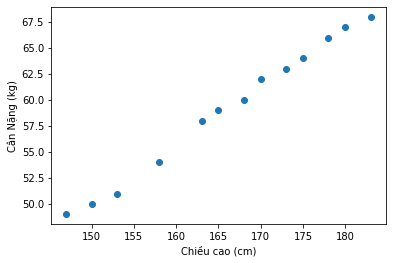

,Height,Weight
0,147,49
1,150,50
2,153,51
3,158,54
4,163,58
5,165,59
6,168,60
7,170,62
8,173,63
9,175,64


In [2]:
data_file = '../data/LR1.csv'
data = pd.read_csv(data_file)
inputs, outputs = data.iloc[:, 0:1], data.iloc[:, 1]
X, y = np.array(inputs.values), np.array(outputs.values)

plt.scatter(X, y)
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân Nặng (kg)')
plt.show()

data

In [3]:
def sgrad(w, X, y, i, rd_id):
    true_i = rd_id[i]
    xi = X[true_i, :]
    yi = y[true_i]
    
    a = np.dot(xi, w) - yi #MSE
    return (xi*a).reshape(2, 1)

def SGD(w_init, X, y, lr):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        #shuffle data
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1
            g = sgrad(w[-1], X, y, i, rd_id)
            w_new = w[-1] - lr*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:
                    return w
                w_last_check = w_this_check
    return w

In [6]:
Xbar = np.concatenate((np.ones((X.size, 1)), X), axis = 1)
w_init = np.random.randn(2, 1)
lr = 0.1
w1 = SGD(w_init, Xbar, y, lr)
w1 

<ipython-input-3-f5cf68d91065>:7: RuntimeWarning: overflow encountered in multiply
  return (xi*a).reshape(2, 1)
<ipython-input-3-f5cf68d91065>:21: RuntimeWarning: invalid value encountered in subtract
  w_new = w[-1] - lr*g


[array([[1.67334676],
        [0.14525859]]),
 array([[  5.00924542],
        [550.56853782]]),
 array([[   -9789.0116523 ],
        [-1742785.15125613]]),
 array([[2.83985937e+07],
        [4.62882359e+09]]),
 array([[-7.77386776e+10],
        [-1.30602400e+13]]),
 array([[2.28484235e+14],
        [3.99852851e+16]]),
 array([[-6.91539796e+17],
        [-1.19635927e+20]]),
 array([[1.88962526e+21],
        [2.98550419e+23]]),
 array([[-4.56612075e+24],
        [-6.98607037e+26]]),
 array([[1.27803993e+28],
        [2.33895006e+30]]),
 array([[-4.20895987e+31],
        [-7.57608929e+33]]),
 array([[1.13603459e+35],
        [1.70392562e+37]]),
 array([[-2.89565112e+38],
        [-4.92283423e+40]]),
 array([[7.23396023e+41],
        [1.06332553e+44]]),
 array([[-1.67940328e+45],
        [-2.65353683e+47]]),
 array([[4.58910725e+48],
        [7.93940737e+50]]),
 array([[-1.19049809e+52],
        [-1.78564155e+54]]),
 array([[3.03451919e+55],
        [5.15892084e+57]]),
 array([[-8.40630989